# MODEL TRAINING 

### 1) importing data required packages  

##### importing Numpy, Pandas, Seaborn, Maplotlib and Warning library 

In [5]:
# basic import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# model import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


#### import csv data and pandas dataframe

In [6]:
df = pd.read_csv('data/stud.csv')

#### show top 5 records 

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
x = df.drop(columns=['math_score'],axis=1)

In [9]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y = df['math_score']

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
# column transformer with 3 typres of transformation
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [13]:
x= preprocessor.fit_transform(x)

In [14]:
x.shape

(1000, 19)

In [15]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [16]:
# split data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

#### create an evaluate function to give all metrics after model training 

In [18]:
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, mae, r2

In [20]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostClassifier(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('model performance for training set')
    print("- Root mean squared error : {:.4f}".format(model_train_mse))
    print("- Mean absolute error : {:.4f}".format(model_train_mae))
    print("- R2 : {:.4f}".format(model_train_r2))
    r2_list.append(model_train_r2)
    
    print('='*35)
    print('\n')

LinearRegression
model performance for training set
- Root mean squared error : 28.3349
- Mean absolute error : 4.2667
- R2 : 0.8743


Lasso
model performance for training set
- Root mean squared error : 43.4784
- Mean absolute error : 5.2063
- R2 : 0.8071


Ridge
model performance for training set
- Root mean squared error : 28.3378
- Mean absolute error : 4.2650
- R2 : 0.8743


KNeighborsRegressor
model performance for training set
- Root mean squared error : 32.5776
- Mean absolute error : 4.5167
- R2 : 0.8555


RandomForestRegressor
model performance for training set
- Root mean squared error : 5.2465
- Mean absolute error : 1.8154
- R2 : 0.9767


AdaBoostRegressor
model performance for training set
- Root mean squared error : 155.2988
- Mean absolute error : 9.7963
- R2 : 0.3112


GradientBoostingRegressor
model performance for training set
- Root mean squared error : 21.4086
- Mean absolute error : 3.7226
- R2 : 0.9050


DecisionTreeRegressor
model performance for training set
- 

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,DecisionTreeRegressor,0.999653
4,RandomForestRegressor,0.976728
6,GradientBoostingRegressor,0.905040
0,LinearRegression,0.874317
2,Ridge,0.874304
3,KNeighborsRegressor,0.855498
8,SVR,0.808128
1,Lasso,0.807146
5,AdaBoostRegressor,0.311153


### DecisionTreeRegressor

In [23]:
dtree_model = DecisionTreeRegressor()
dtree_model = dtree_model.fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 75.48


In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [32]:
dtree_model = RandomForestRegressor()
dtree_model = dtree_model.fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.92


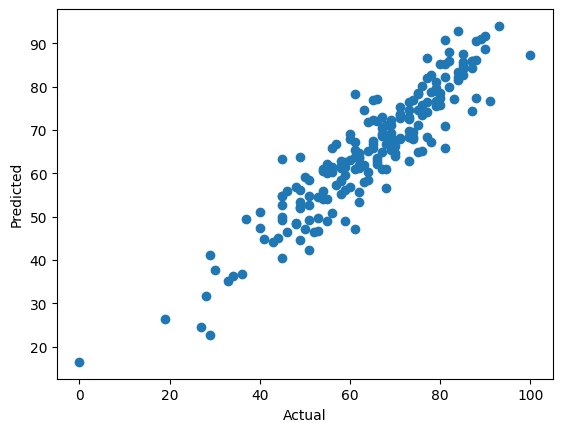

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

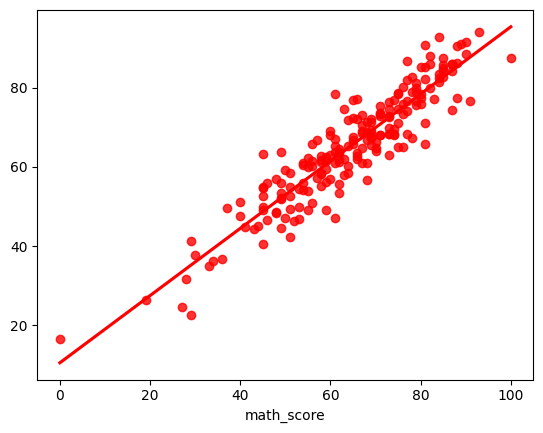

In [34]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.70,14.30
737,53,54.50,-1.50
740,80,75.87,4.13
660,74,77.01,-3.01
411,84,81.48,2.52
...,...,...,...
408,52,46.39,5.61
332,62,61.25,0.75
208,74,68.05,5.95
613,65,66.82,-1.82


In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


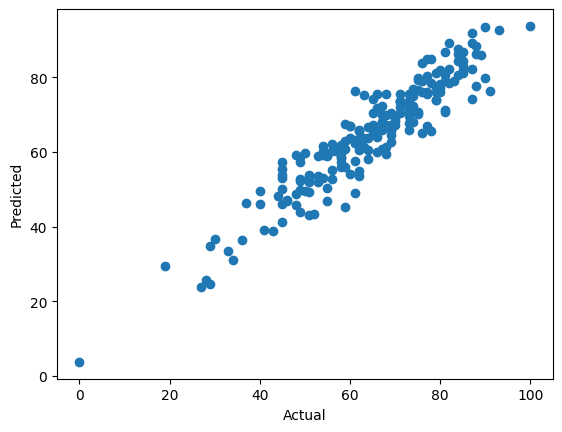

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

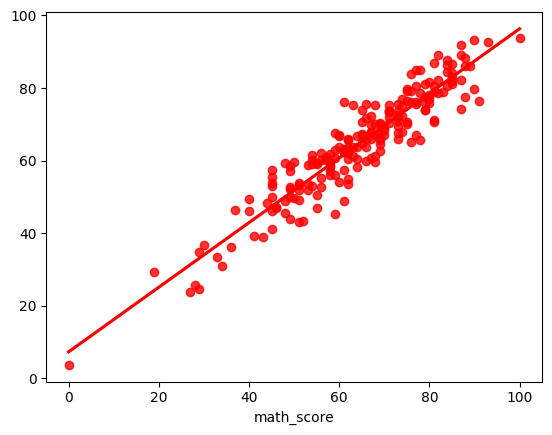

In [29]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.70,14.30
737,53,54.50,-1.50
740,80,75.87,4.13
660,74,77.01,-3.01
411,84,81.48,2.52
...,...,...,...
408,52,46.39,5.61
332,62,61.25,0.75
208,74,68.05,5.95
613,65,66.82,-1.82
